# Essential Dataset - 탐색적 데이터 분석 (EDA)

## 목적
- Essential Dataset의 기본 특성 이해
- 타겟 변수 분포 확인
- 변수 간 상관관계 분석
- 모델링 전략 수립

## 1. 환경 설정 및 데이터 로드

In [21]:
# 필요 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 시각화 스타일 설정 (한글 폰트 설정 전에)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 한글 폰트 설정 (중요: seaborn 스타일 설정 후에 와야 함)
import platform
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 폰트 설정 확인
print(f"현재 폰트: {plt.rcParams['font.family']}")
print("라이브러리 로드 완료!")

현재 폰트: ['AppleGothic']
라이브러리 로드 완료!


In [22]:
# 데이터 로드
import os
from pathlib import Path

# 경로 설정
BASE_DIR = Path('../../..')  # analysis_prediction 폴더
DATA_DIR = BASE_DIR / 'data' / 'essential'

# Essential 데이터셋 로드
df = pd.read_csv(DATA_DIR / 'model_dataset_essential.csv')
print(f"데이터 크기: {df.shape[0]:,} 행 × {df.shape[1]} 열")
print(f"메모리 사용량: {df.memory_usage().sum() / 1024**2:.2f} MB")

데이터 크기: 1,200 행 × 20 열
메모리 사용량: 0.18 MB


## 2. 데이터 구조 파악

In [23]:
# 컬럼 분류
identifiers = ['hadm_id', 'subject_id']
demographics = ['age', 'gender', 'admission_type']
targets = ['death_type', 'death_binary', 'hospital_death', 'los_hours', 'los_days']
other = ['hospital_expire_flag']

# Lab 변수 식별
lab_features = [col for col in df.columns 
                if col not in identifiers + demographics + targets + other]

print("컬럼 구성:")
print(f"- 식별자: {len(identifiers)}개")
print(f"- 인구통계: {len(demographics)}개")
print(f"- 타겟 변수: {len(targets)}개")
print(f"- Lab 변수: {len(lab_features)}개")
print(f"- 기타: {len(other)}개")
print(f"\n총 {len(df.columns)}개 컬럼")

컬럼 구성:
- 식별자: 2개
- 인구통계: 3개
- 타겟 변수: 5개
- Lab 변수: 9개
- 기타: 1개

총 20개 컬럼


In [24]:
# 데이터 타입 확인
print("데이터 타입 요약:")
print(df.dtypes.value_counts())
print("\n범주형 변수:")
print([col for col in df.columns if df[col].dtype == 'object'])

데이터 타입 요약:
float64    11
int64       6
object      3
Name: count, dtype: int64

범주형 변수:
['death_type', 'gender', 'admission_type']


In [25]:
# 첫 5행 확인
df.head()

,hadm_id,subject_id,death_type,death_binary,hospital_death,los_hours,los_days,age,gender,admission_type,hospital_expire_flag,Hematocrit_51221_merged,Hemoglobin_51222,Creatinine_50912_merged,RDW_51277,White_Blood_Cells_51301_merged,Urea_Nitrogen_51006_merged,Potassium_50971_merged,Sodium_50983_merged,Glucose_50931
0,29686042,12823948,alive,0,0,15.216667,0.634028,51,F,EU OBSERVATION,0,44.3,15.0,0.5,12.6,10.7,5.0,3.6,135.0,97.0
1,23654078,17275231,alive,0,0,90.133333,3.755556,65,M,EW EMER.,0,38.6,14.0,1.1,12.9,7.5,14.0,3.8,137.0,112.0
2,28963677,18666150,alive,0,0,31.200000,1.300000,53,M,DIRECT OBSERVATION,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24798258,16232868,alive,0,0,90.550000,3.772917,64,M,EU OBSERVATION,0,29.8,9.8,4.3,15.2,5.7,74.0,3.4,137.0,89.0
4,25574544,15077620,alive,0,0,49.850000,2.077083,60,F,EU OBSERVATION,0,34.5,12.0,0.6,13.8,9.8,8.0,3.8,141.0,95.0


## 3. 결측값 분석

In [26]:
# 전체 결측값 현황
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isna().sum(),
    'Missing_Percent': (df.isna().sum() / len(df) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"결측값이 있는 컬럼: {len(missing_summary)}개 / {len(df.columns)}개")
print(f"평균 결측률: {missing_summary['Missing_Percent'].mean():.2f}%")
print(f"\n결측률 Top 10:")
print(missing_summary.head(10))

결측값이 있는 컬럼: 9개 / 20개
평균 결측률: 6.05%

결측률 Top 10:
                                                        Column  Missing_Count  \
Glucose_50931                                    Glucose_50931            101   
Sodium_50983_merged                        Sodium_50983_merged             88   
Potassium_50971_merged                  Potassium_50971_merged             86   
Urea_Nitrogen_51006_merged          Urea_Nitrogen_51006_merged             78   
Creatinine_50912_merged                Creatinine_50912_merged             74   
RDW_51277                                            RDW_51277             59   
White_Blood_Cells_51301_merged  White_Blood_Cells_51301_merged             58   
Hemoglobin_51222                              Hemoglobin_51222             57   
Hematocrit_51221_merged                Hematocrit_51221_merged             52   

                                Missing_Percent  
Glucose_50931                              8.42  
Sodium_50983_merged                      

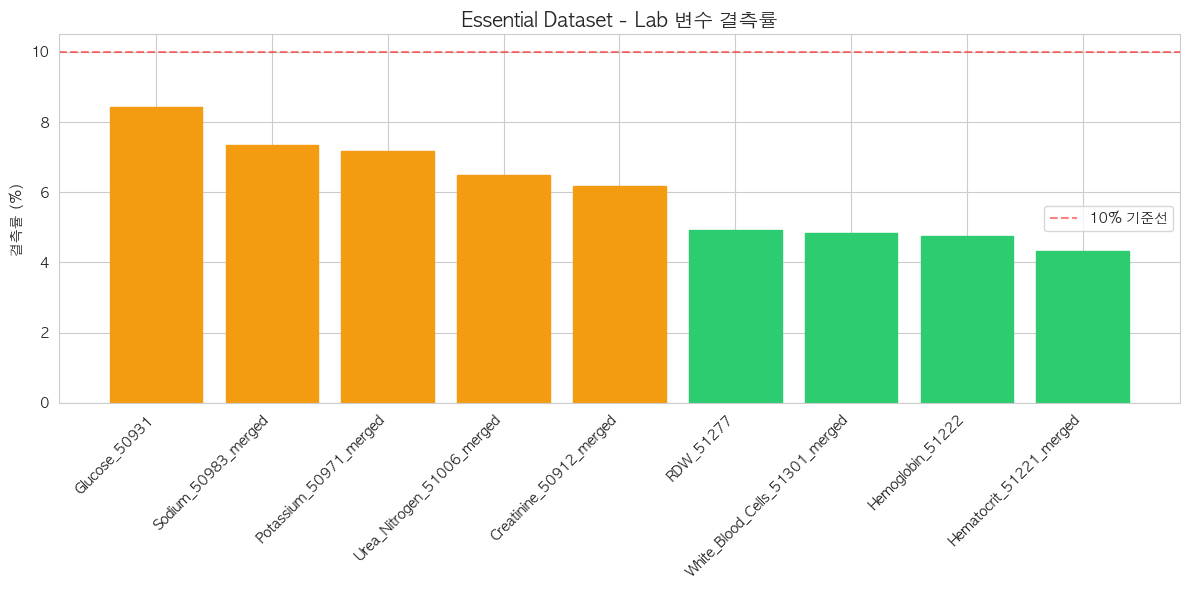

모든 Lab 변수의 결측률이 10% 미만: True


In [27]:
# Lab 변수의 결측률 시각화
lab_missing = df[lab_features].isna().mean() * 100
lab_missing = lab_missing.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(lab_missing)), lab_missing.values)
plt.xticks(range(len(lab_missing)), lab_missing.index, rotation=45, ha='right')
plt.ylabel('결측률 (%)')
plt.title('Essential Dataset - Lab 변수 결측률', fontsize=14, fontweight='bold')
plt.axhline(y=10, color='r', linestyle='--', alpha=0.5, label='10% 기준선')

# 막대 색상 설정
for i, bar in enumerate(bars):
    if lab_missing.values[i] < 5:
        bar.set_color('#2ecc71')
    elif lab_missing.values[i] < 10:
        bar.set_color('#f39c12')
    else:
        bar.set_color('#e74c3c')

plt.legend()
plt.tight_layout()
plt.show()

print(f"모든 Lab 변수의 결측률이 10% 미만: {(lab_missing < 10).all()}")

In [28]:
# 완전한 케이스 분석
complete_cases = df.dropna()
print(f"완전한 케이스: {len(complete_cases):,}개 ({len(complete_cases)/len(df)*100:.1f}%)")
print(f"결측값이 있는 케이스: {len(df) - len(complete_cases):,}개 ({(len(df) - len(complete_cases))/len(df)*100:.1f}%)")

완전한 케이스: 1,096개 (91.3%)
결측값이 있는 케이스: 104개 (8.7%)


## 4. 타겟 변수 분석

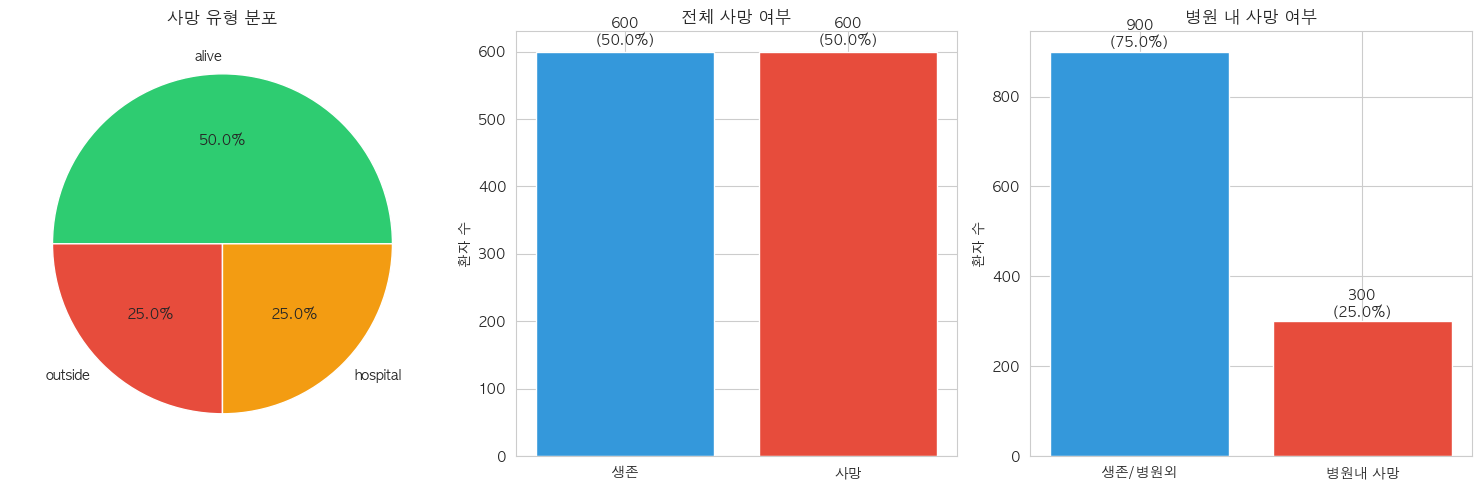

In [29]:
# 사망 관련 타겟 변수 분포
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# death_type 분포
death_type_counts = df['death_type'].value_counts()
axes[0].pie(death_type_counts.values, labels=death_type_counts.index, 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c', '#f39c12'])
axes[0].set_title('사망 유형 분포', fontsize=12, fontweight='bold')

# death_binary 분포
death_binary_counts = df['death_binary'].value_counts()
axes[1].bar(['생존', '사망'], death_binary_counts.values, color=['#3498db', '#e74c3c'])
axes[1].set_title('전체 사망 여부', fontsize=12, fontweight='bold')
axes[1].set_ylabel('환자 수')
for i, v in enumerate(death_binary_counts.values):
    axes[1].text(i, v + 10, f"{v}\n({v/len(df)*100:.1f}%)", ha='center')

# hospital_death 분포
hospital_death_counts = df['hospital_death'].value_counts()
axes[2].bar(['생존/병원외', '병원내 사망'], hospital_death_counts.values, color=['#3498db', '#e74c3c'])
axes[2].set_title('병원 내 사망 여부', fontsize=12, fontweight='bold')
axes[2].set_ylabel('환자 수')
for i, v in enumerate(hospital_death_counts.values):
    axes[2].text(i, v + 10, f"{v}\n({v/len(df)*100:.1f}%)", ha='center')

plt.tight_layout()
plt.show()

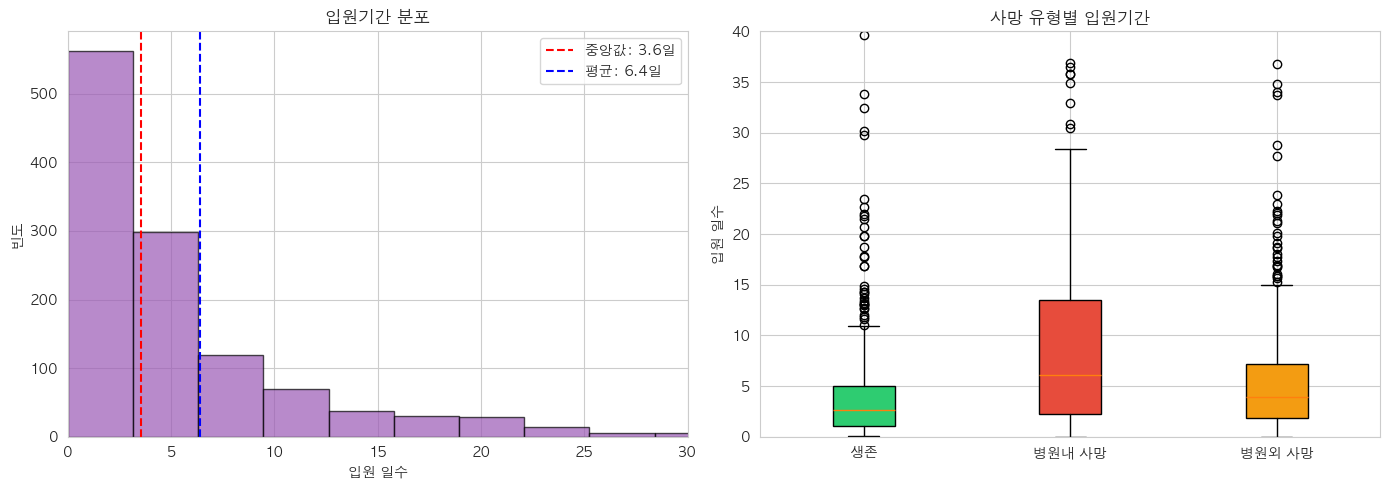

입원기간 통계:
count    1200.000000
mean        6.389216
std        10.480003
min         0.000000
25%         1.451389
50%         3.552778
75%         7.007465
max       157.838194
Name: los_days, dtype: float64

30일 이상 입원: 31명 (2.6%)


In [30]:
# 입원기간 분포
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램
axes[0].hist(df['los_days'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0].axvline(df['los_days'].median(), color='red', linestyle='--', label=f"중앙값: {df['los_days'].median():.1f}일")
axes[0].axvline(df['los_days'].mean(), color='blue', linestyle='--', label=f"평균: {df['los_days'].mean():.1f}일")
axes[0].set_xlabel('입원 일수')
axes[0].set_ylabel('빈도')
axes[0].set_title('입원기간 분포', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, 30)  # 30일까지만 표시

# 박스플롯 (사망 유형별)
death_types = ['alive', 'hospital', 'outside']
los_by_death = [df[df['death_type'] == dt]['los_days'].dropna() for dt in death_types]
bp = axes[1].boxplot(los_by_death, labels=['생존', '병원내 사망', '병원외 사망'], patch_artist=True)
colors = ['#2ecc71', '#e74c3c', '#f39c12']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
axes[1].set_ylabel('입원 일수')
axes[1].set_title('사망 유형별 입원기간', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 40)

plt.tight_layout()
plt.show()

# 통계 요약
print("입원기간 통계:")
print(df['los_days'].describe())
print(f"\n30일 이상 입원: {(df['los_days'] > 30).sum()}명 ({(df['los_days'] > 30).mean()*100:.1f}%)")

## 5. 인구통계 변수 분석

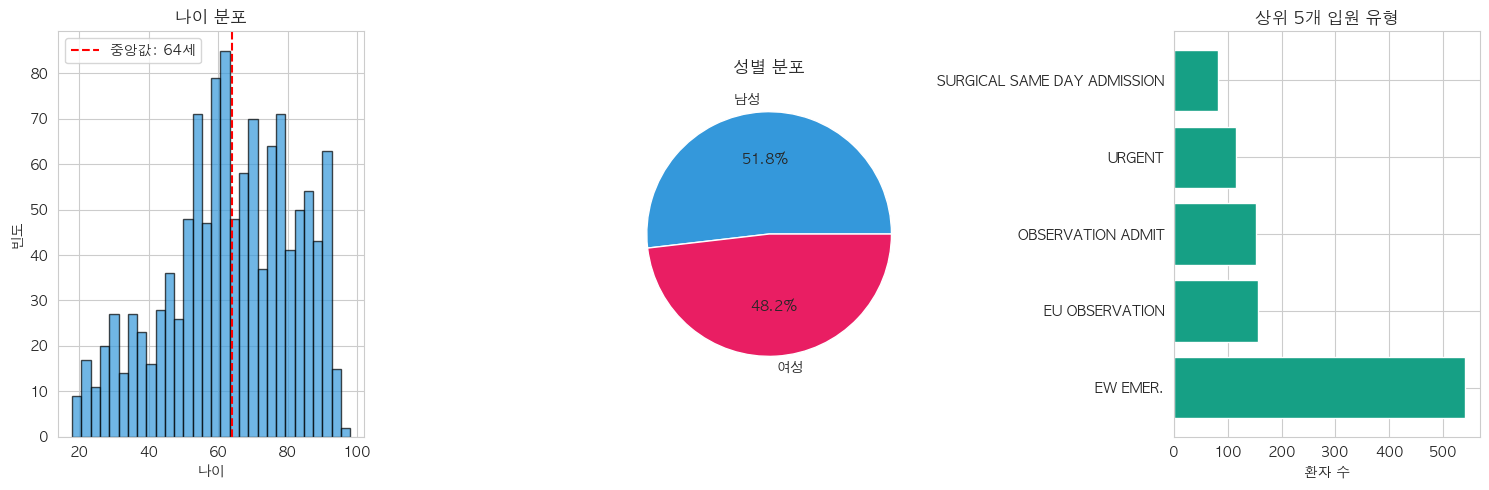

In [31]:
# 인구통계 분포
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 나이 분포
axes[0].hist(df['age'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].axvline(df['age'].median(), color='red', linestyle='--', label=f"중앙값: {df['age'].median():.0f}세")
axes[0].set_xlabel('나이')
axes[0].set_ylabel('빈도')
axes[0].set_title('나이 분포', fontsize=12, fontweight='bold')
axes[0].legend()

# 성별 분포
gender_counts = df['gender'].value_counts()
axes[1].pie(gender_counts.values, labels=['남성', '여성'], autopct='%1.1f%%', 
            colors=['#3498db', '#e91e63'])
axes[1].set_title('성별 분포', fontsize=12, fontweight='bold')

# 입원 유형 분포
admission_counts = df['admission_type'].value_counts().head(5)
axes[2].barh(range(len(admission_counts)), admission_counts.values, color='#16a085')
axes[2].set_yticks(range(len(admission_counts)))
axes[2].set_yticklabels(admission_counts.index)
axes[2].set_xlabel('환자 수')
axes[2].set_title('상위 5개 입원 유형', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

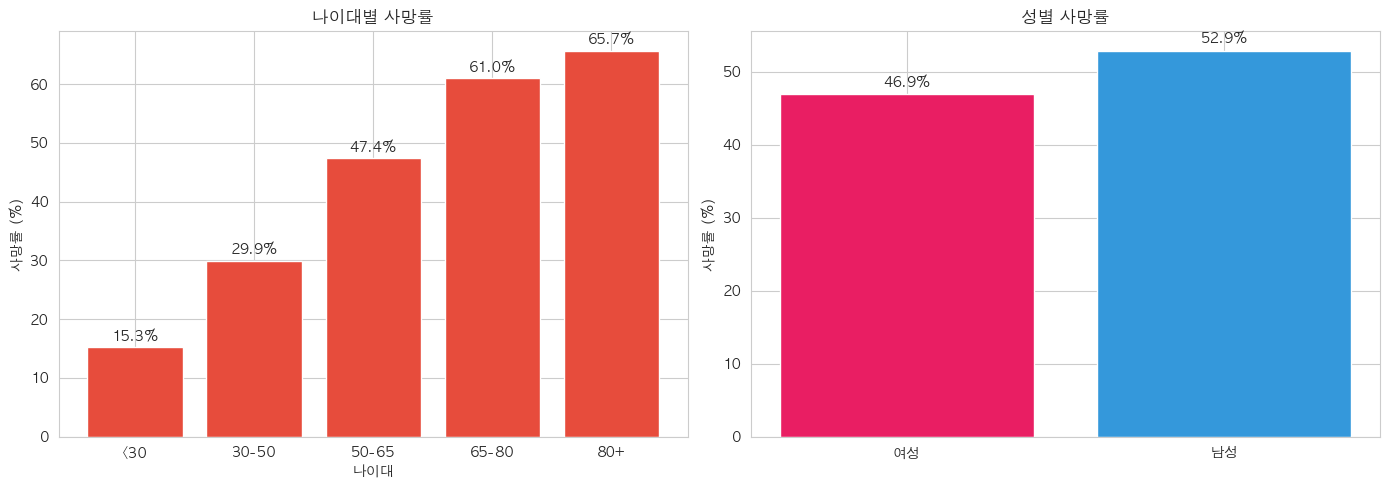

In [32]:
# 인구통계별 사망률
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 나이대별 사망률
age_bins = [0, 30, 50, 65, 80, 100]
age_labels = ['<30', '30-50', '50-65', '65-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

mortality_by_age = df.groupby('age_group')['death_binary'].mean() * 100
axes[0].bar(range(len(mortality_by_age)), mortality_by_age.values, color='#e74c3c')
axes[0].set_xticks(range(len(mortality_by_age)))
axes[0].set_xticklabels(mortality_by_age.index)
axes[0].set_ylabel('사망률 (%)')
axes[0].set_xlabel('나이대')
axes[0].set_title('나이대별 사망률', fontsize=12, fontweight='bold')
for i, v in enumerate(mortality_by_age.values):
    axes[0].text(i, v + 1, f"{v:.1f}%", ha='center')

# 성별 사망률
mortality_by_gender = df.groupby('gender')['death_binary'].mean() * 100
axes[1].bar(['여성', '남성'], mortality_by_gender.values, color=['#e91e63', '#3498db'])
axes[1].set_ylabel('사망률 (%)')
axes[1].set_title('성별 사망률', fontsize=12, fontweight='bold')
for i, v in enumerate(mortality_by_gender.values):
    axes[1].text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

# 통계적 유의성 검정 (나중에 추가 가능)

## 6. Lab 변수 분석

In [33]:
# Lab 변수 기본 통계
lab_stats = df[lab_features].describe().T
lab_stats['missing_%'] = (df[lab_features].isna().mean() * 100).round(2)
print("Lab 변수 통계 요약:")
print(lab_stats[['count', 'mean', 'std', 'min', '50%', 'max', 'missing_%']])

Lab 변수 통계 요약:
                                 count        mean        std    min     50%  \
Hematocrit_51221_merged         1148.0   34.664634   6.607177   10.5   34.70   
Hemoglobin_51222                1143.0   11.369554   2.363855    2.8   11.30   
Creatinine_50912_merged         1126.0    1.544583   1.748747    0.0    1.00   
RDW_51277                       1141.0   15.219720   2.438994   11.4   14.60   
White_Blood_Cells_51301_merged  1142.0   10.067688   7.769935    0.1    8.55   
Urea_Nitrogen_51006_merged      1122.0   26.741533  21.637700    2.0   19.00   
Potassium_50971_merged          1114.0    4.294434   0.762536    2.0    4.20   
Sodium_50983_merged             1112.0  138.012590   4.681371  120.0  138.00   
Glucose_50931                   1099.0  140.371247  76.762167   26.0  116.00   

                                  max  missing_%  
Hematocrit_51221_merged          54.3       4.33  
Hemoglobin_51222                 18.3       4.75  
Creatinine_50912_merged         

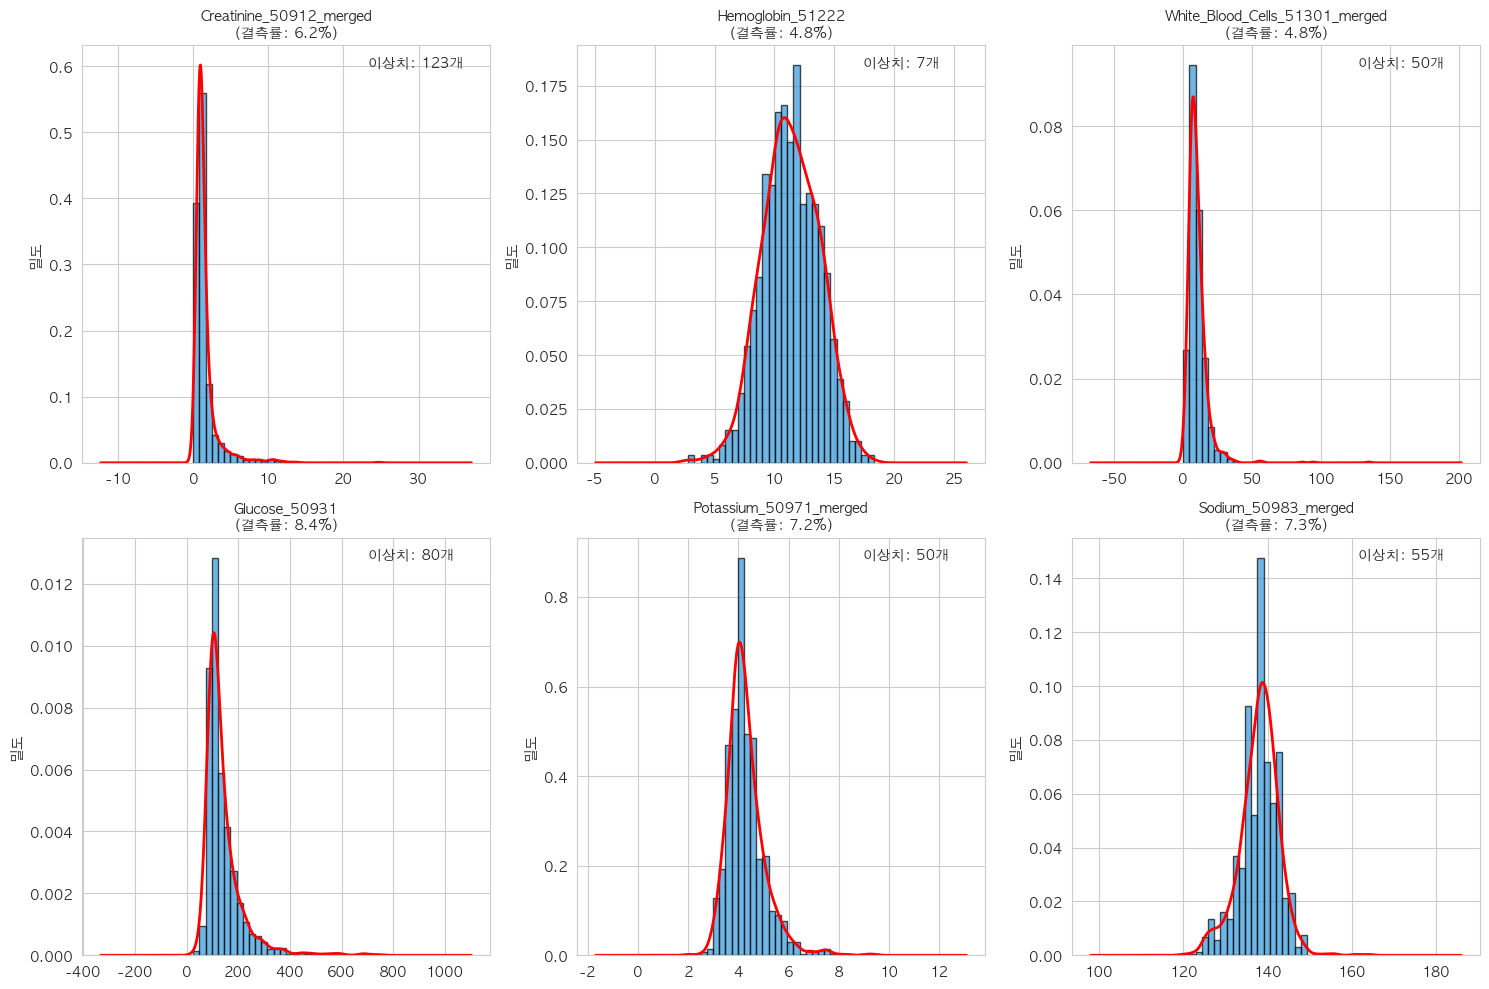

In [34]:
# Lab 변수 분포 시각화 (주요 변수)
key_labs = ['Creatinine_50912_merged', 'Hemoglobin_51222', 'White_Blood_Cells_51301_merged', 
            'Glucose_50931', 'Potassium_50971_merged', 'Sodium_50983_merged']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, lab in enumerate(key_labs):
    # 히스토그램과 KDE
    data = df[lab].dropna()
    axes[i].hist(data, bins=30, alpha=0.7, color='#3498db', edgecolor='black', density=True)
    data.plot.kde(ax=axes[i], color='red', linewidth=2)
    axes[i].set_title(f'{lab}\n(결측률: {df[lab].isna().mean()*100:.1f}%)', fontsize=10)
    axes[i].set_ylabel('밀도')
    
    # 이상치 표시 (IQR 방법)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)).sum()
    axes[i].text(0.7, 0.95, f'이상치: {outliers}개', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

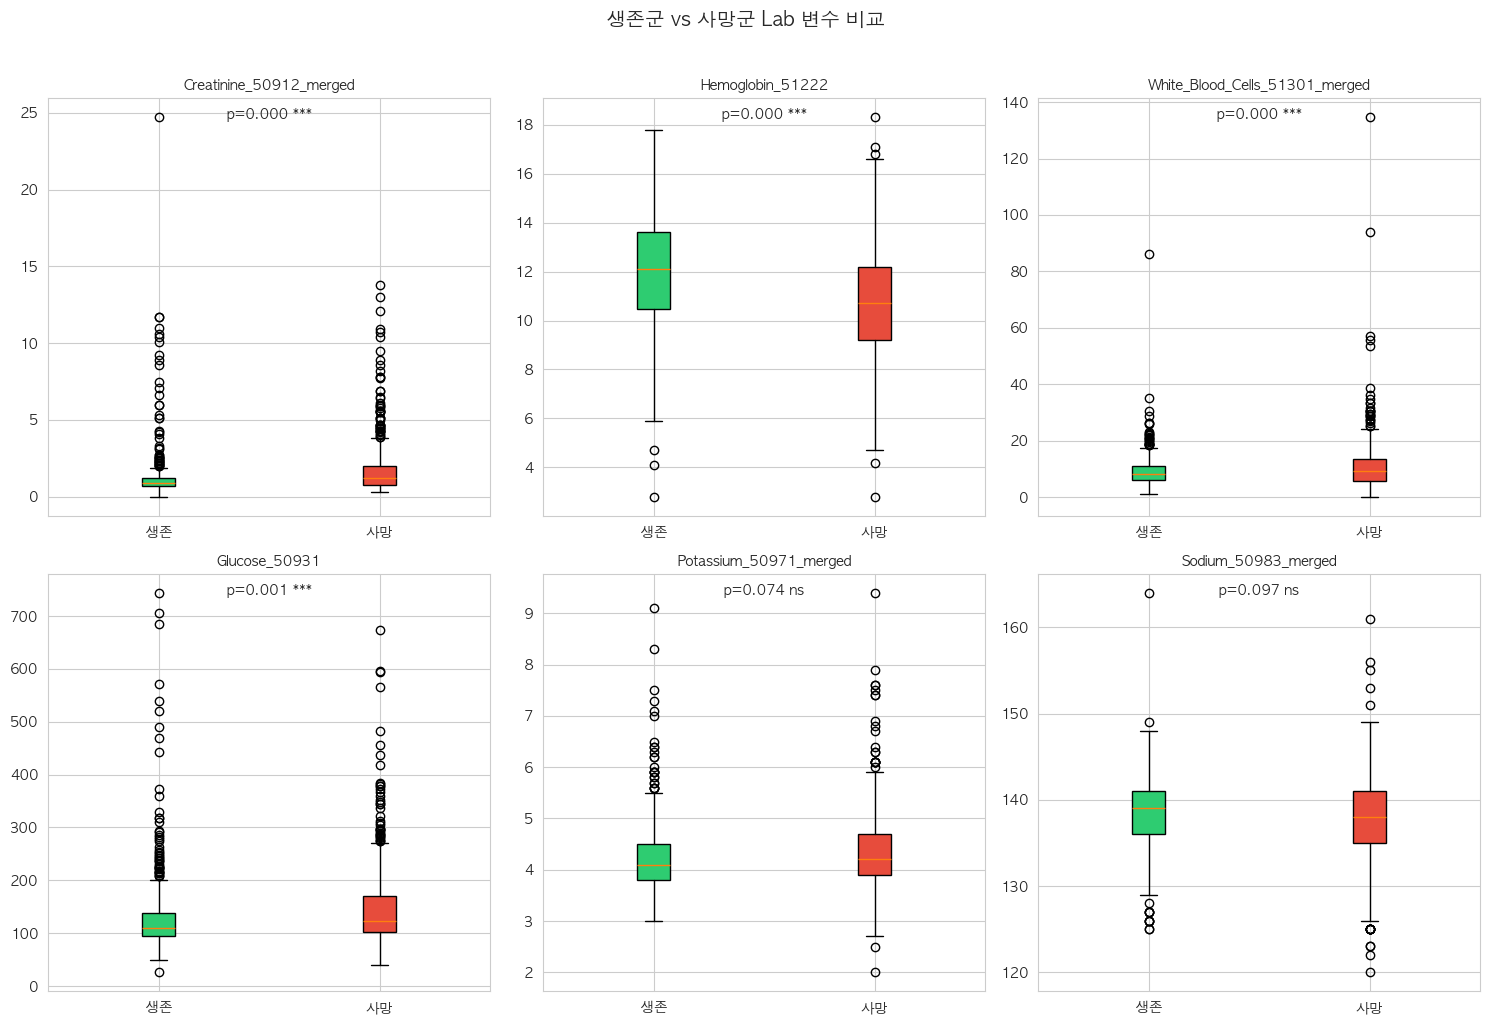

In [35]:
# 사망군과 생존군의 Lab 변수 비교
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, lab in enumerate(key_labs):
    alive_data = df[df['death_binary'] == 0][lab].dropna()
    dead_data = df[df['death_binary'] == 1][lab].dropna()
    
    bp = axes[i].boxplot([alive_data, dead_data], labels=['생존', '사망'], patch_artist=True)
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')
    
    axes[i].set_title(f'{lab}', fontsize=10)
    
    # t-test (간단한 통계 검정)
    from scipy import stats
    t_stat, p_value = stats.ttest_ind(alive_data, dead_data)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    axes[i].text(0.5, 0.95, f'p={p_value:.3f} {significance}', 
                transform=axes[i].transAxes, ha='center')

plt.suptitle('생존군 vs 사망군 Lab 변수 비교', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 7. 상관관계 분석

In [36]:
# 상관관계 매트릭스 계산
# 수치형 변수만 선택
numeric_cols = ['age', 'death_binary', 'hospital_death', 'los_days'] + lab_features
corr_matrix = df[numeric_cols].corr()

# 타겟 변수와의 상관관계
target_corrs = pd.DataFrame({
    'death_binary': corr_matrix['death_binary'].sort_values(ascending=False),
    'hospital_death': corr_matrix['hospital_death'].sort_values(ascending=False),
    'los_days': corr_matrix['los_days'].sort_values(ascending=False)
})

print("타겟 변수와 가장 상관관계가 높은 변수 (Top 10):")
print("\n1. 전체 사망 (death_binary):")
print(target_corrs['death_binary'].head(11)[1:])  # 자기 자신 제외
print("\n2. 병원 내 사망 (hospital_death):")
print(target_corrs['hospital_death'].head(11)[1:])
print("\n3. 입원기간 (los_days):")
print(target_corrs['los_days'].head(11)[1:])

타겟 변수와 가장 상관관계가 높은 변수 (Top 10):

1. 전체 사망 (death_binary):
Glucose_50931                     0.104041
Hematocrit_51221_merged          -0.216069
Hemoglobin_51222                 -0.243168
Potassium_50971_merged            0.053469
RDW_51277                         0.314250
Sodium_50983_merged              -0.049801
Urea_Nitrogen_51006_merged        0.238598
White_Blood_Cells_51301_merged    0.106105
age                               0.298376
death_binary                      1.000000
Name: death_binary, dtype: float64

2. 병원 내 사망 (hospital_death):
Glucose_50931                     0.143958
Hematocrit_51221_merged          -0.120360
Hemoglobin_51222                 -0.157205
Potassium_50971_merged            0.067552
RDW_51277                         0.209774
Sodium_50983_merged              -0.042222
Urea_Nitrogen_51006_merged        0.243625
White_Blood_Cells_51301_merged    0.213418
age                               0.230537
death_binary                      0.577350
Name: hospital_de

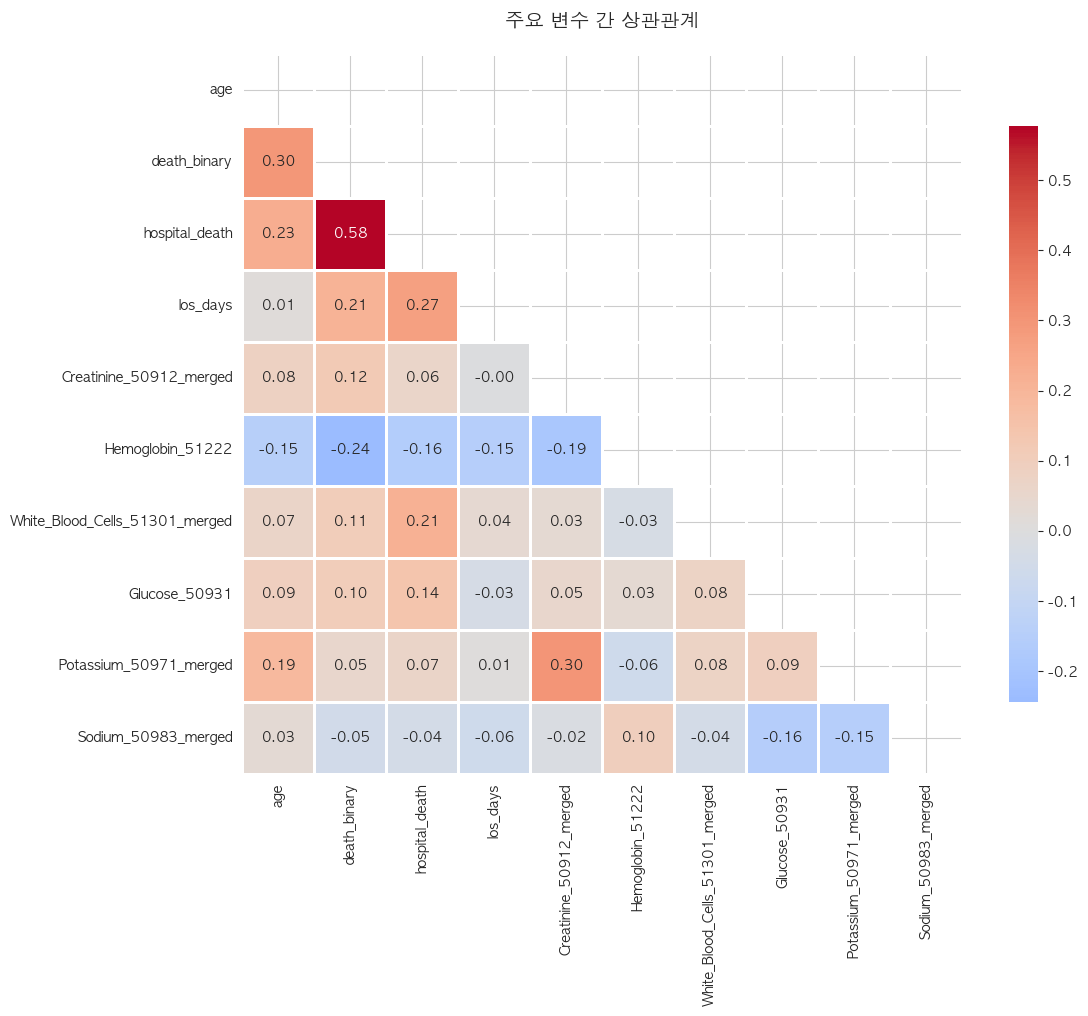

In [37]:
# 상관관계 히트맵 (주요 변수만)
important_vars = ['age', 'death_binary', 'hospital_death', 'los_days'] + key_labs
corr_subset = df[important_vars].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_subset, dtype=bool))
sns.heatmap(corr_subset, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('주요 변수 간 상관관계', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 8. 주요 발견사항 정리

In [18]:
# 주요 통계 요약
summary = {
    '데이터셋 크기': f"{len(df):,} × {len(df.columns)}",
    '완전한 케이스': f"{len(df.dropna()):,} ({len(df.dropna())/len(df)*100:.1f}%)",
    '평균 결측률': f"{df.isna().mean().mean()*100:.2f}%",
    '전체 사망률': f"{df['death_binary'].mean()*100:.1f}%",
    '병원 내 사망률': f"{df['hospital_death'].mean()*100:.1f}%",
    '평균 입원기간': f"{df['los_days'].mean():.1f}일 (±{df['los_days'].std():.1f})",
    '평균 나이': f"{df['age'].mean():.1f}세 (±{df['age'].std():.1f})",
    '성별 비율': f"남성 {(df['gender']=='M').mean()*100:.1f}%, 여성 {(df['gender']=='F').mean()*100:.1f}%"
}

print("=" * 50)
print("Essential Dataset EDA 요약")
print("=" * 50)
for key, value in summary.items():
    print(f"{key:20}: {value}")

Essential Dataset EDA 요약
데이터셋 크기             : 1,200 × 21
완전한 케이스             : 1,096 (91.3%)
평균 결측률              : 2.59%
전체 사망률              : 50.0%
병원 내 사망률            : 25.0%
평균 입원기간             : 6.4일 (±10.5)
평균 나이               : 63.5세 (±18.4)
성별 비율               : 남성 51.8%, 여성 48.2%


In [19]:
# 모델링 권장사항
recommendations = [
    "✅ 매우 낮은 결측률 (평균 6%) - 단순 대체 방법으로도 충분",
    "✅ 완전한 케이스 91.3% - Complete Case Analysis 가능",
    "✅ 균형잡힌 타겟 분포 - 클래스 불균형 문제 없음",
    "⚠️ 일부 Lab 변수에 이상치 존재 - 전처리 필요",
    "💡 Creatinine, Urea_Nitrogen이 사망과 높은 상관관계",
    "💡 나이가 사망 예측의 중요 변수로 보임",
    "💡 입원기간 예측 시 사망 여부를 특징으로 활용 가능"
]

print("\n" + "=" * 50)
print("모델링 권장사항")
print("=" * 50)
for rec in recommendations:
    print(rec)


모델링 권장사항
✅ 매우 낮은 결측률 (평균 6%) - 단순 대체 방법으로도 충분
✅ 완전한 케이스 91.3% - Complete Case Analysis 가능
✅ 균형잡힌 타겟 분포 - 클래스 불균형 문제 없음
⚠️ 일부 Lab 변수에 이상치 존재 - 전처리 필요
💡 Creatinine, Urea_Nitrogen이 사망과 높은 상관관계
💡 나이가 사망 예측의 중요 변수로 보임
💡 입원기간 예측 시 사망 여부를 특징으로 활용 가능


## 9. 다음 단계

1. **베이스라인 모델 개발** (`02_baseline_model.ipynb`)
   - Logistic Regression (사망 예측)
   - Linear Regression (입원기간 예측)

2. **Tree 기반 모델** (`03_tree_models.ipynb`)
   - Random Forest
   - XGBoost
   - 특징 중요도 분석

3. **모델 비교 및 평가** (`04_model_comparison.ipynb`)
   - 교차검증
   - 성능 비교
   - 최종 모델 선택

In [20]:
# 분석 결과 저장 (선택사항)
import json
from datetime import datetime

eda_results = {
    'timestamp': datetime.now().isoformat(),
    'dataset': 'essential',
    'summary': summary,
    'missing_rate': df[lab_features].isna().mean().to_dict(),
    'target_correlations': {
        'death_binary_top5': target_corrs['death_binary'].head(6)[1:].to_dict(),
        'los_days_top5': target_corrs['los_days'].head(6)[1:].to_dict()
    }
}

# 결과 저장
with open('../results/eda_results.json', 'w') as f:
    json.dump(eda_results, f, indent=2, default=str)

print("EDA 결과가 저장되었습니다: ../results/eda_results.json")

EDA 결과가 저장되었습니다: ../results/eda_results.json
